In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LEITURA E ADEQUAMENTO DOS DADOS

In [2]:
df = pd.read_csv('dados_demanda.csv',sep=';')
df.drop(['TEMPO'],axis=1,inplace=True)
data = np.array(df)
data = tf.keras.utils.normalize(data,axis=1)

x_train = data[0:216,0:5]
y_train = data[0:216,5:7]

x_test = data[216:308,0:5]
y_test = data[216:308,5:7]

# CRIAÇÃO E TREINAMENTO DA REDE

In [3]:
# Criando Rede
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(5))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.sigmoid))

# Parâmetros de treinamento
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['mean_squared_error'])

# Treinando 
model.fit(x_train,y_train,epochs=5000)

Epoch 1/5000
7/7 [==============================] - 1s 4ms/step - loss: 0.1132 - mean_squared_error: 0.1132
Epoch 2/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 3/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 4/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 5/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 6/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 7/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 8/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 9/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 10/5000
7/7 [=========

# VALIDAÇÃO

3/3 [==============================] - 0s 3ms/step


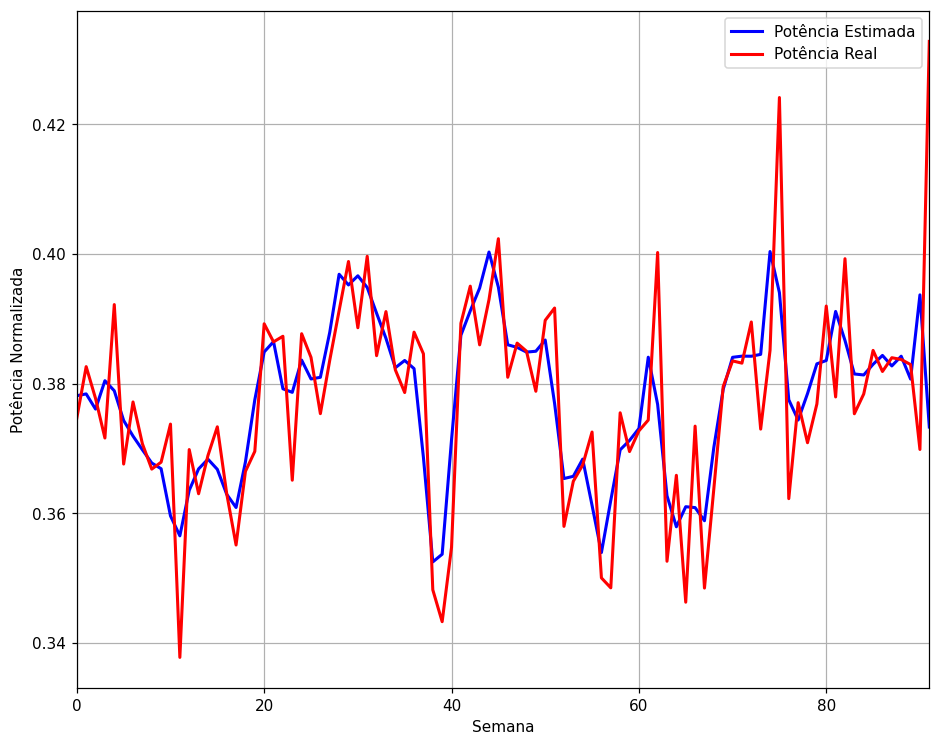

In [4]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred[:,0],lw=2,color='Blue')
plt.plot(y_test[:,0],lw=2,color='Red')
plt.grid(True)
plt.xlim([0,91])
plt.xlabel('Semana')
plt.ylabel('Potência Normalizada')
plt.legend(['Potência Estimada','Potência Real']) 

# DEMAIS VALIDAÇÕES

In [5]:
import seaborn as sns

datas = pd.read_csv('redes.csv',sep=';')
datas.head()

pf = datas.pivot_table(values='MSE',index='HL 1',columns='HL 2')

Text(70.72222222222221, 0.5, 'Número de neurônios na camada 1')

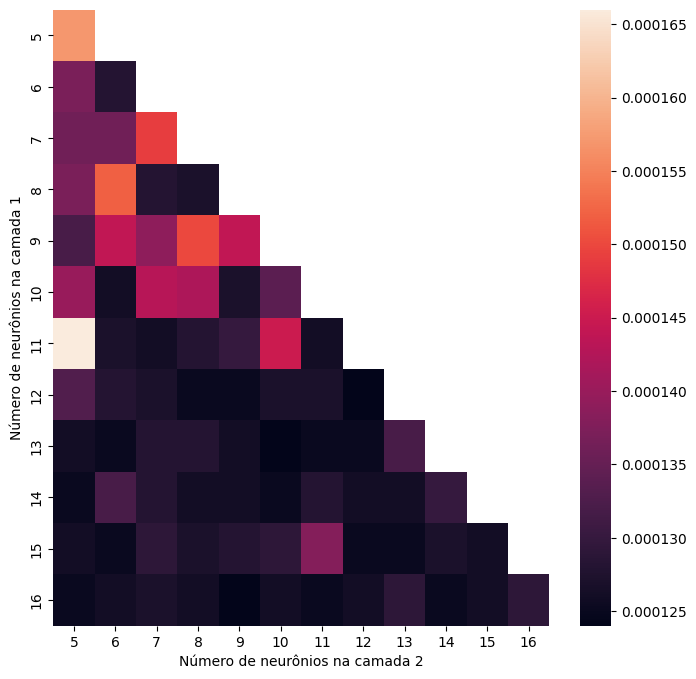

In [6]:
#datas.head()
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(pf)
plt.xlabel('Número de neurônios na camada 2')
plt.ylabel('Número de neurônios na camada 1')

C:\Users\josel\AppData\Local\Temp\ipykernel_8004\1784186140.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred[:,0]-y_test[:,0])


<Axes: ylabel='Density'>

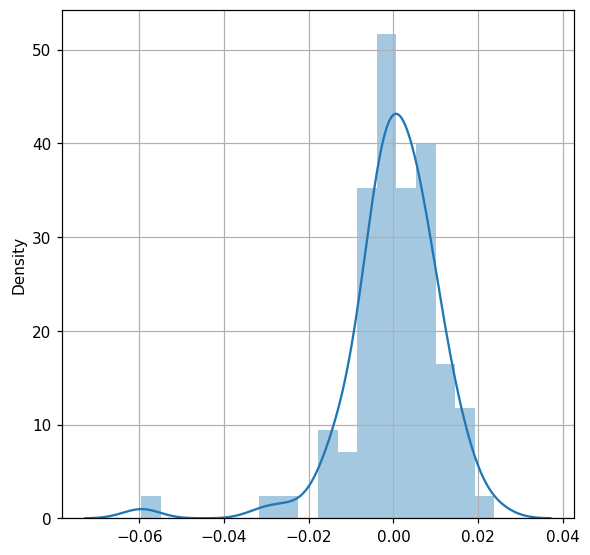

In [7]:
plt.figure(figsize=(6,6),dpi=110)
plt.grid(True)
#plt.plot(y_pred[:,0]-y_test[:,0])
#plt.xlim([0,91])
sns.distplot(y_pred[:,0]-y_test[:,0])